In [21]:
# Forecasting Residential U.S. Natural Gas Consumption 

import pandas as pd 
import numpy as np 
pd.options.display.max_rows = 999
import itertools
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from statsmodels.tsa.arima_model import ARIMA
plotly.tools.set_credentials_file(username='williamadams1', api_key='VGpRfgrW4kQrd7efAKUa')
import cufflinks as cf
import statsmodels.api as sm
import matplotlib
%matplotlib inline

df = pd.read_csv("ng_consumption.csv", index_col = 0)
df.head(20)

,gas
date,
Jan-1973,843900
Feb-1973,747331
Mar-1973,648504
Apr-1973,465867
May-1973,326313
Jun-1973,207172
Jul-1973,150349
Aug-1973,142498
Sep-1973,159378


In [22]:
# Covnert date column to DatetimeIndex
df.index = pd.DatetimeIndex(df.index)

In [23]:
df = df.groupby('date')['gas'].sum().reset_index()

In [24]:
df = df.set_index('date')

In [25]:
y = df['gas'].resample('M').mean()
y = y.fillna(y.bfill())

In [26]:
y['2017':]

date
2017-01-31    830679
2017-02-28    579313
2017-03-31    579768
2017-04-30    278910
2017-05-31    199451
2017-06-30    124038
2017-07-31    107423
2017-08-31    103832
2017-09-30    114548
2017-10-31    205068
2017-11-30    467638
2017-12-31    821617
2018-01-31    974901
2018-02-28    686506
2018-03-31    655675
2018-04-30    438693
2018-05-31    167864
2018-06-30    118789
2018-07-31    105424
Freq: M, Name: gas, dtype: int64

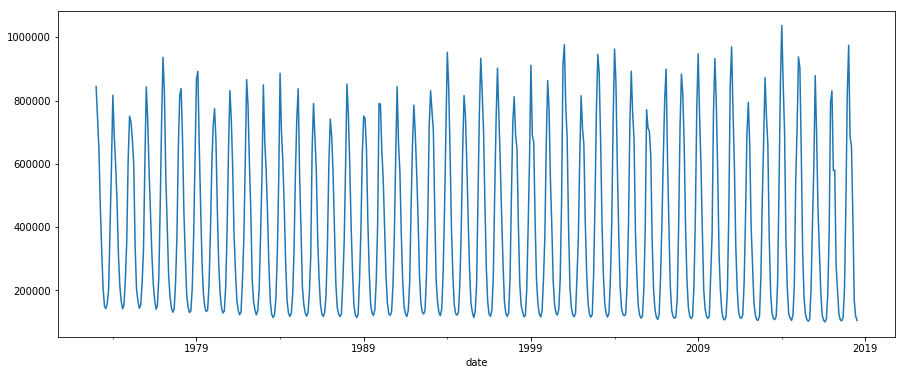

In [27]:
y.plot(figsize=(15, 6))
plt.show()

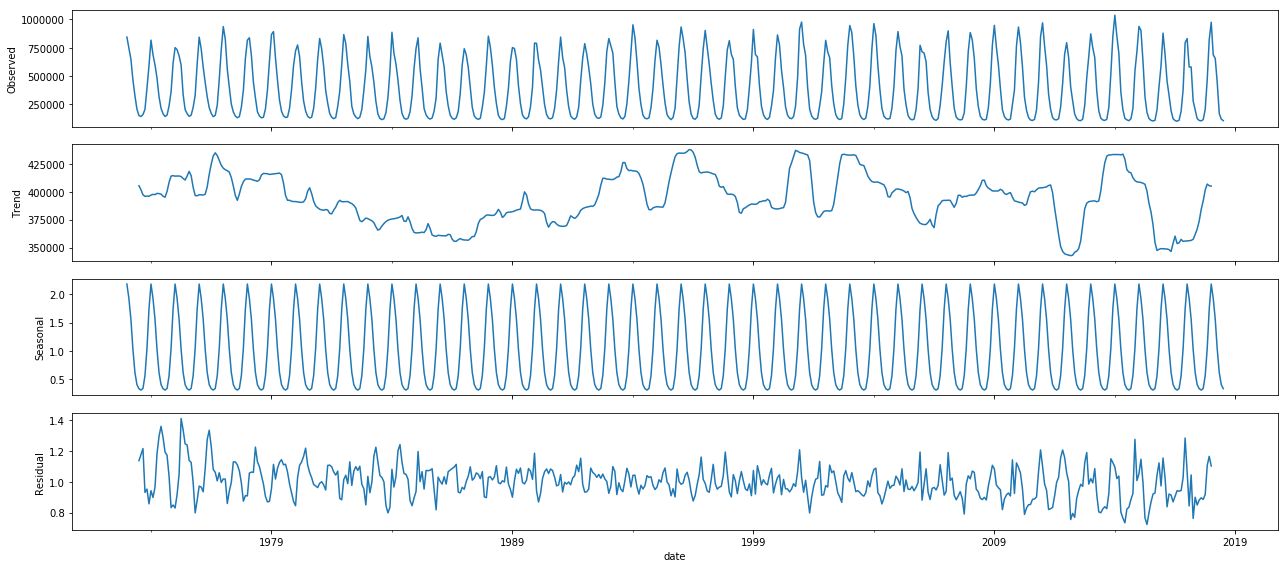

In [28]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model = 'multiplicative')
fig = decomposition.plot()
plt.show()

In [29]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:15823.16706863604
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:15111.855433422988
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:13271.77108831174
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:12877.86264247675
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:13296.288370592492
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:13221.69614271092
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:12922.94689203889
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:12876.100440455391
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:15352.180934609238
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:15787.196750470412
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:13166.668566240534
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:12758.8761684257
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:16021.65653358049
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:15762.472366048729
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:12850.968425385336
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:12758.83277253922
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:14579.609824040192
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:13968.635017829049
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:13

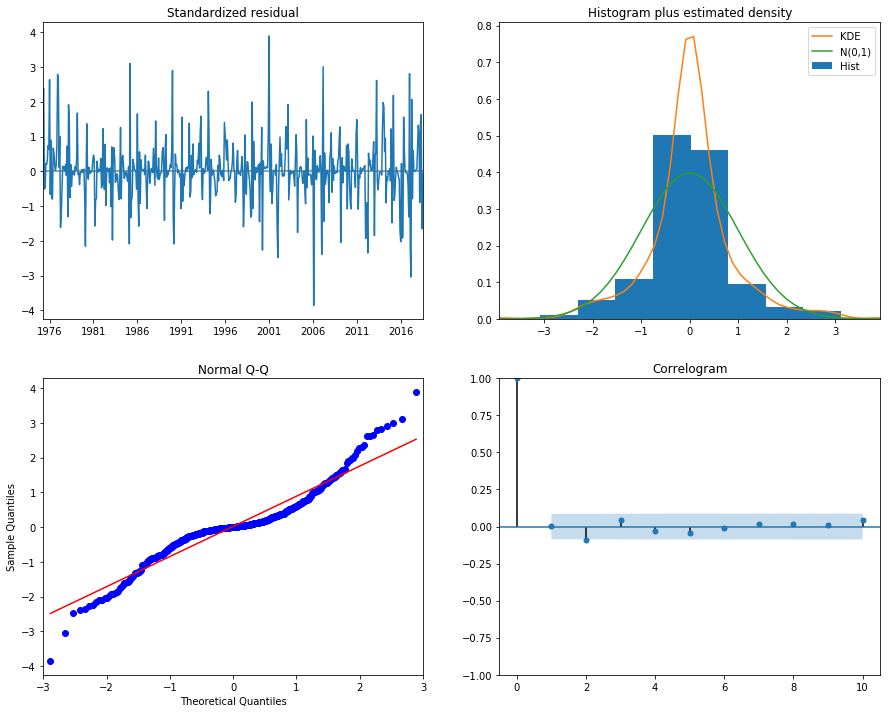

In [30]:
# Iterate a GridSearch function to test different parameters of seasonal ARIMA models 
import warnings 

warnings.filterwarnings("ignore") # specify to ignore warning messages
AIC_list = pd.DataFrame({}, columns=['param','param_seasonal','AIC'])
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            temp = pd.DataFrame([[ param ,  param_seasonal , results.aic ]], columns=['param','param_seasonal','AIC'])
            AIC_list = AIC_list.append( temp, ignore_index=True)  # DataFrame append
            del temp

        except:
            continue


m = np.amin(AIC_list['AIC'].values) # Find minimum value in AIC
l = AIC_list['AIC'].tolist().index(m) # Find index number for lowest AIC
Min_AIC_list = AIC_list.iloc[l,:]



mod = sm.tsa.statespace.SARIMAX(y,
                                order=Min_AIC_list['param'],
                                seasonal_order=Min_AIC_list['param_seasonal'],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

print("### Min_AIC_list ### \n{}".format(Min_AIC_list))

print(results.summary().tables[1])

results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [31]:
y['2016':].head()

date
2016-01-31    878936
2016-02-29    690077
2016-03-31    455001
2016-04-30    328059
2016-05-31    193922
Freq: M, Name: gas, dtype: int64

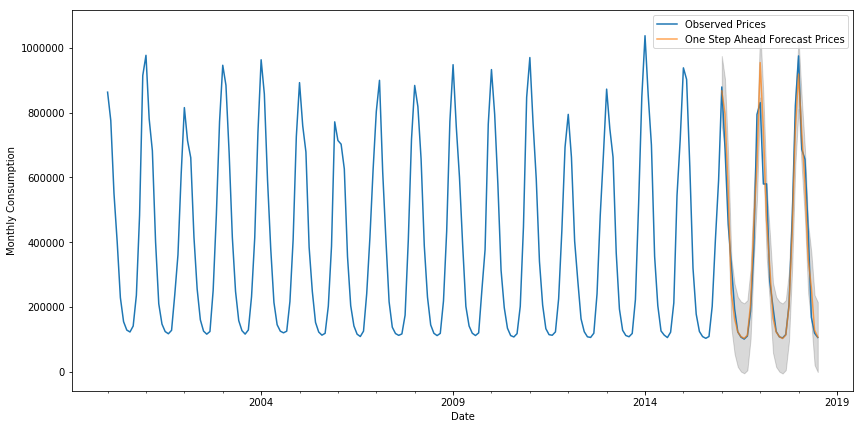

In [32]:
pred = results.get_prediction(start = pd.to_datetime('2016-01-31'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2000':].plot(label = 'Observed Prices')
pred.predicted_mean.plot(ax=ax, label='One Step Ahead Forecast Prices', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha= 0.15)

ax.set_xlabel('Date')
ax.set_ylabel('Monthly Consumption')
plt.legend()

plt.show()

In [33]:
y_forecasted = pred.predicted_mean
y_actual = y['2016-01-31':]
mse = ((y_forecasted - y_actual) ** 2).mean()
print('The MSE of the forecasts is {}'.format(round(mse, 2)))
print('The RMSE of the forecasts is {}'.format(round(np.sqrt(mse), 2)))

The MSE of the forecasts is 5005457407.1
The RMSE of the forecasts is 70749.26


In [35]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2016-01-31'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

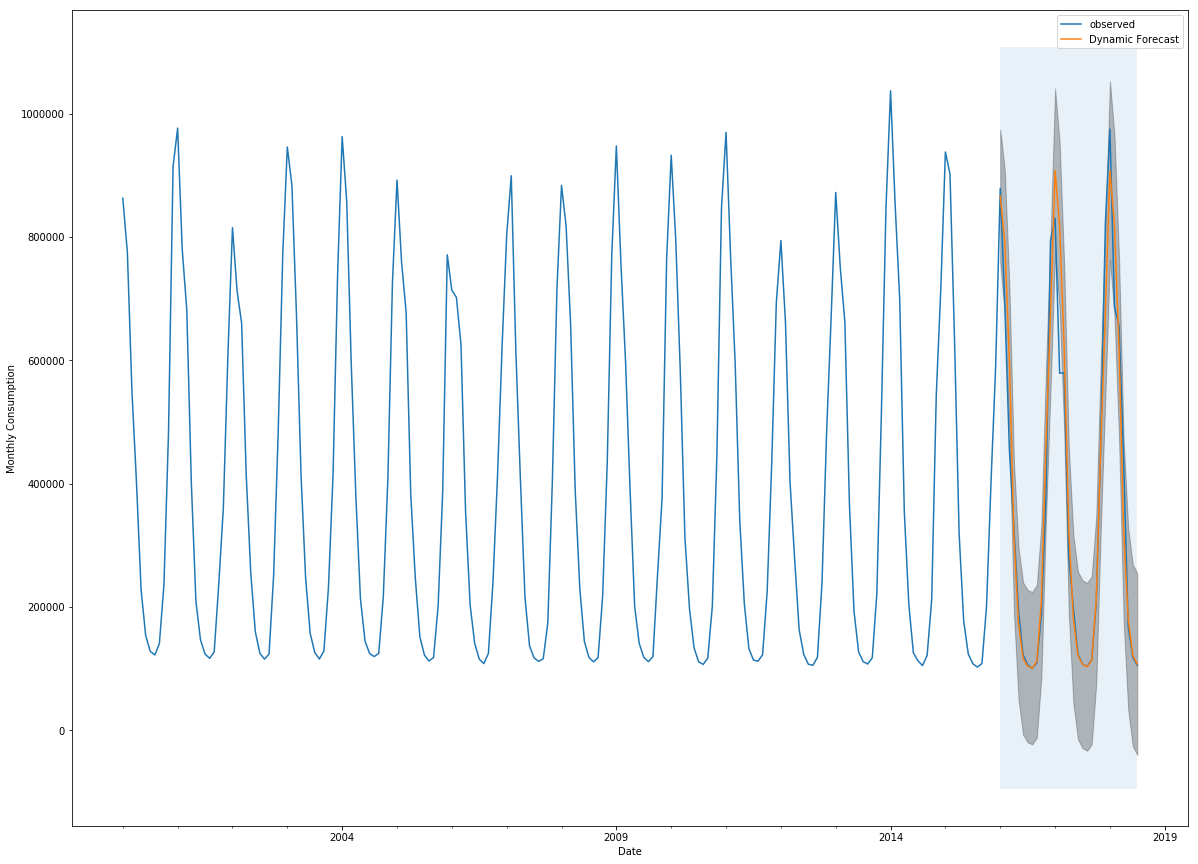

In [36]:
ax = y['2000':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2016-01-31'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Monthly Consumption')

plt.legend()
plt.show()

In [37]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2016-01-31':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The MSE of the forecasts is {}'.format(round(mse, 2)))

The MSE of the forecasts is 5739701209.01


In [43]:
# Get forecast 500 steps ahead in future

pred_uc = results.get_forecast(steps= 100)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

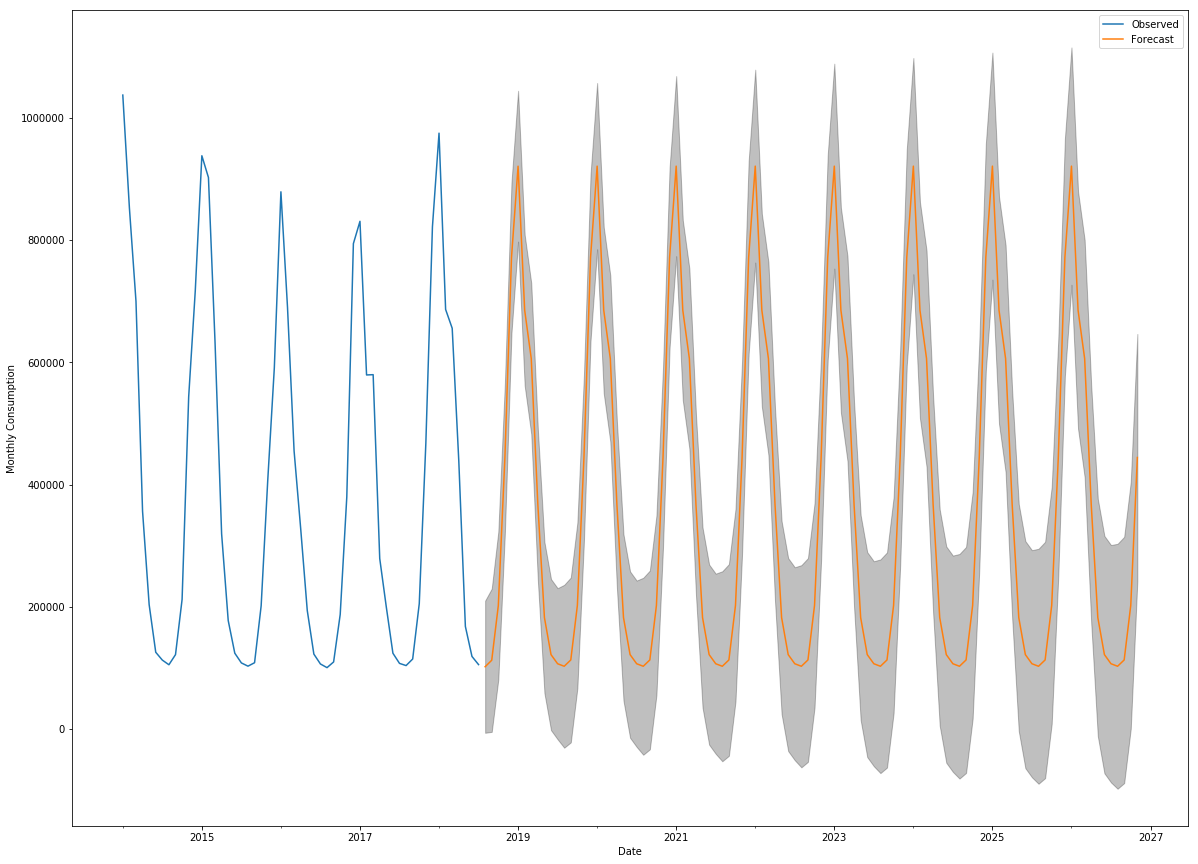

In [45]:
ax = y['2014':].plot(label='Observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color = 'k', alpha = .25)
ax.set_xlabel('Date')
ax.set_ylabel('Monthly Consumption')

plt.legend()
plt.show()